In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import urllib.request
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten


def download_and_extract_dataset(url, extract_path, dataset_folder_name="UCI HAR Dataset"):
    
    
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
    
 
    zip_path = os.path.join(extract_path, f"{dataset_folder_name.replace(' ', '_')}.zip")
    

    if not os.path.exists(zip_path):
        print("Downloading dataset...")
        urllib.request.urlretrieve(url, zip_path)
    
    dataset_full_path = os.path.join(extract_path, dataset_folder_name)
    

    if not os.path.exists(dataset_full_path):
        print("Extracting dataset...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
    
    print("Dataset ready at:", dataset_full_path)
    return dataset_full_path

def load_raw_inertial_data(dataset_path):
   
    base_folder = dataset_path

    train_acc_path = os.path.join(base_folder, "train", "Inertial Signals", "total_acc_x_train.txt")
    train_gyro_path = os.path.join(base_folder, "train", "Inertial Signals", "body_gyro_x_train.txt")
    test_acc_path = os.path.join(base_folder, "test", "Inertial Signals", "total_acc_x_test.txt")
    test_gyro_path = os.path.join(base_folder, "test", "Inertial Signals", "body_gyro_x_test.txt")
    

    for file_path in [train_acc_path, train_gyro_path, test_acc_path, test_gyro_path]:
        if not os.path.exists(file_path):
            print(f"Warning: File {file_path} does not exist!")
    

    axes = ['x', 'y', 'z']
    train_acc_data = {axis: np.loadtxt(os.path.join(base_folder, "train", "Inertial Signals", f"total_acc_{axis}_train.txt")) for axis in axes}
    train_gyro_data = {axis: np.loadtxt(os.path.join(base_folder, "train", "Inertial Signals", f"body_gyro_{axis}_train.txt")) for axis in axes}
    test_acc_data = {axis: np.loadtxt(os.path.join(base_folder, "test", "Inertial Signals", f"total_acc_{axis}_test.txt")) for axis in axes}
    test_gyro_data = {axis: np.loadtxt(os.path.join(base_folder, "test", "Inertial Signals", f"body_gyro_{axis}_test.txt")) for axis in axes}

    train_labels = np.loadtxt(os.path.join(base_folder, "train", "y_train.txt"))
    test_labels = np.loadtxt(os.path.join(base_folder, "test", "y_test.txt"))
    
    data = {
        "train_acc": train_acc_data,
        "train_gyro": train_gyro_data,
        "train_labels": train_labels,
        "test_acc": test_acc_data,
        "test_gyro": test_gyro_data,
        "test_labels": test_labels,
    }
    return data

if __name__ == "__main__":

    dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"

    extract_path = "./data"
    

    dataset_path = download_and_extract_dataset(dataset_url, extract_path, dataset_folder_name="UCI HAR Dataset")
    

    data = load_raw_inertial_data(dataset_path)


Dataset ready at: ./data\UCI HAR Dataset


Dataset ready at: ./data\UCI HAR Dataset

Summary Statistics of Accelerometer Data (Train):
Axis x: Mean = 0.8047, Std = 0.4141
Axis y: Mean = 0.0288, Std = 0.3910
Axis z: Mean = 0.0865, Std = 0.3578

Summary Statistics of Gyroscope Data (Train):
Axis x: Mean = 0.0005, Std = 0.4068
Axis y: Mean = -0.0008, Std = 0.3819
Axis z: Mean = 0.0001, Std = 0.2557


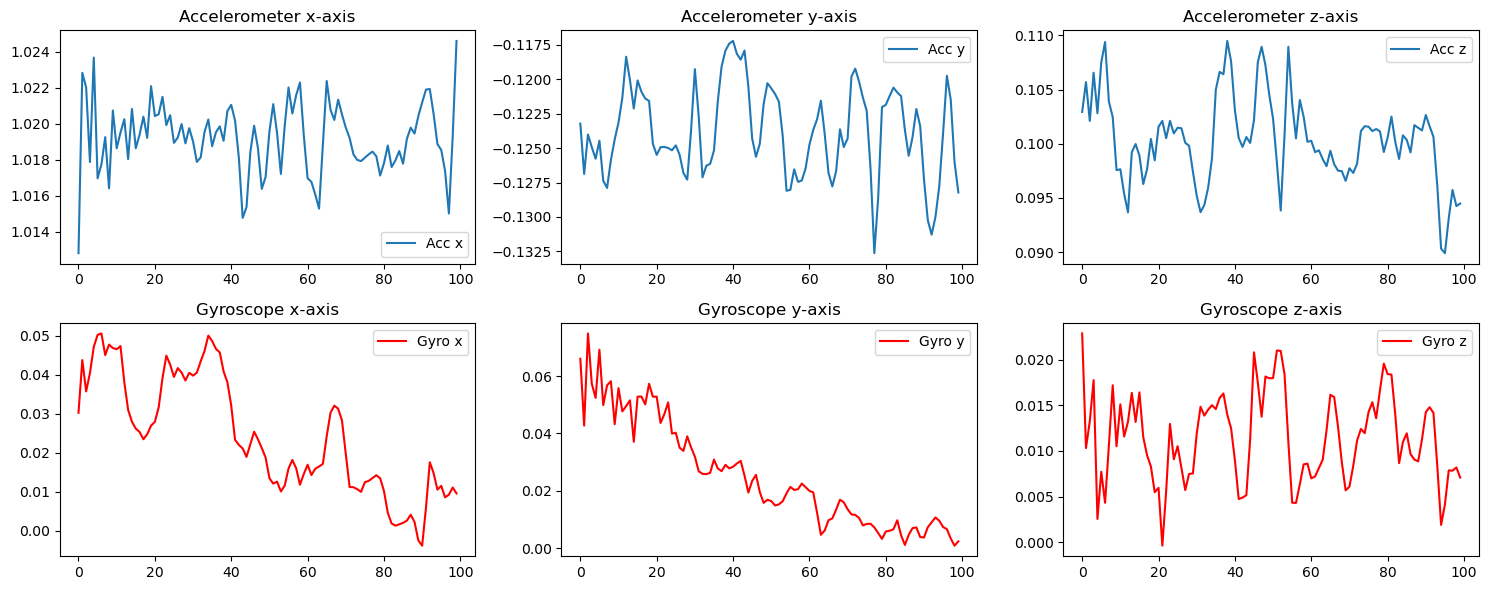

C:\Users\V.SHRI KAMALESH\AppData\Local\Temp\ipykernel_3120\3512613707.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


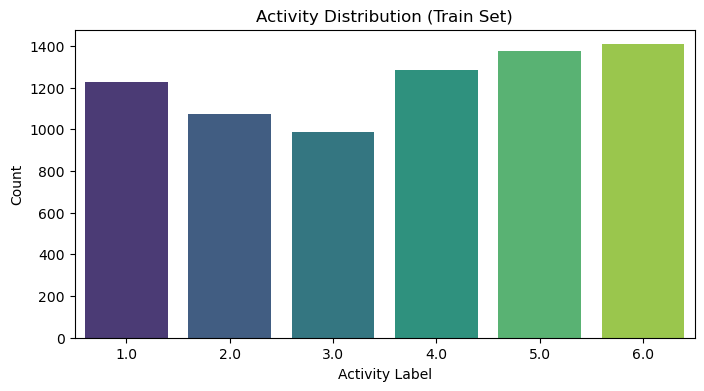

C:\Users\V.SHRI KAMALESH\AppData\Local\Temp\ipykernel_3120\3512613707.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


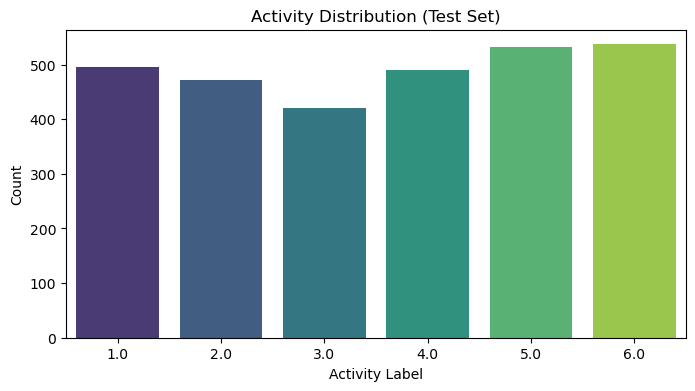

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import urllib.request
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten


def download_and_extract_dataset(url, extract_path, dataset_folder_name="UCI HAR Dataset"):
   

    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
    
   
    zip_path = os.path.join(extract_path, f"{dataset_folder_name.replace(' ', '_')}.zip")
    

    if not os.path.exists(zip_path):
        print("Downloading dataset...")
        urllib.request.urlretrieve(url, zip_path)
    
    dataset_full_path = os.path.join(extract_path, dataset_folder_name)
    
 
    if not os.path.exists(dataset_full_path):
        print("Extracting dataset...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
    
    print("Dataset ready at:", dataset_full_path)
    return dataset_full_path

def load_raw_inertial_data(dataset_path):
   
    base_folder = dataset_path

    axes = ['x', 'y', 'z']
    
  
    train_acc_data = {axis: np.loadtxt(os.path.join(base_folder, "train", "Inertial Signals", f"total_acc_{axis}_train.txt")) for axis in axes}
    train_gyro_data = {axis: np.loadtxt(os.path.join(base_folder, "train", "Inertial Signals", f"body_gyro_{axis}_train.txt")) for axis in axes}
    test_acc_data = {axis: np.loadtxt(os.path.join(base_folder, "test", "Inertial Signals", f"total_acc_{axis}_test.txt")) for axis in axes}
    test_gyro_data = {axis: np.loadtxt(os.path.join(base_folder, "test", "Inertial Signals", f"body_gyro_{axis}_test.txt")) for axis in axes}
    
  
    train_labels = np.loadtxt(os.path.join(base_folder, "train", "y_train.txt"))
    test_labels = np.loadtxt(os.path.join(base_folder, "test", "y_test.txt"))
    
    data = {
        "train_acc": train_acc_data,
        "train_gyro": train_gyro_data,
        "train_labels": train_labels,
        "test_acc": test_acc_data,
        "test_gyro": test_gyro_data,
        "test_labels": test_labels,
    }
    return data

def calculate_summary_statistics(data):
   
    print("\nSummary Statistics of Accelerometer Data (Train):")
    for axis in ['x', 'y', 'z']:
        print(f"Axis {axis}: Mean = {np.mean(data['train_acc'][axis]):.4f}, Std = {np.std(data['train_acc'][axis]):.4f}")
    
    print("\nSummary Statistics of Gyroscope Data (Train):")
    for axis in ['x', 'y', 'z']:
        print(f"Axis {axis}: Mean = {np.mean(data['train_gyro'][axis]):.4f}, Std = {np.std(data['train_gyro'][axis]):.4f}")

def plot_sample_data(data):
    
    fig, axs = plt.subplots(2, 3, figsize=(15, 6))
    
    for idx, axis in enumerate(['x', 'y', 'z']):
        axs[0, idx].plot(data["train_acc"][axis][0, :100], label=f"Acc {axis}")
        axs[0, idx].set_title(f"Accelerometer {axis}-axis")
        axs[0, idx].legend()
    
        axs[1, idx].plot(data["train_gyro"][axis][0, :100], label=f"Gyro {axis}", color="r")
        axs[1, idx].set_title(f"Gyroscope {axis}-axis")
        axs[1, idx].legend()
    
    plt.tight_layout()
    plt.show()

def plot_activity_distribution(labels, title="Activity Distribution"):
   
    label_counts = pd.Series(labels).value_counts().sort_index()
    plt.figure(figsize=(8, 4))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
    plt.xlabel("Activity Label")
    plt.ylabel("Count")
    plt.title(title)
    plt.xticks(rotation=0)
    plt.show()


if __name__ == "__main__":
  
    dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
    extract_path = "./data"

   
    dataset_path = download_and_extract_dataset(dataset_url, extract_path, dataset_folder_name="UCI HAR Dataset")


    data = load_raw_inertial_data(dataset_path)

 
    calculate_summary_statistics(data)

  
    plot_sample_data(data)


    plot_activity_distribution(data["train_labels"], title="Activity Distribution (Train Set)")
    plot_activity_distribution(data["test_labels"], title="Activity Distribution (Test Set)")


Dataset ready at: ./data\UCI HAR Dataset
Training model...
Epoch 1/10


C:\Users\V.SHRI KAMALESH\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6292 - loss: 0.8630 - val_accuracy: 0.8865 - val_loss: 0.4244
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.9061 - loss: 0.2361 - val_accuracy: 0.8967 - val_loss: 0.3323
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9434 - loss: 0.1315 - val_accuracy: 0.9041 - val_loss: 0.3142
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9544 - loss: 0.1070 - val_accuracy: 0.9150 - val_loss: 0.2880
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9552 - loss: 0.0959 - val_accuracy: 0.9273 - val_loss: 0.2754
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9536 - loss: 0.0989 - val_accuracy: 0.9320 - val_loss: 0.2636
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9631 - loss: 0.0850 - val_accuracy: 0.9225 - val_loss: 0.2852
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9606 - loss: 0.0826 - val_accuracy: 0.9279 - val_loss: 0.

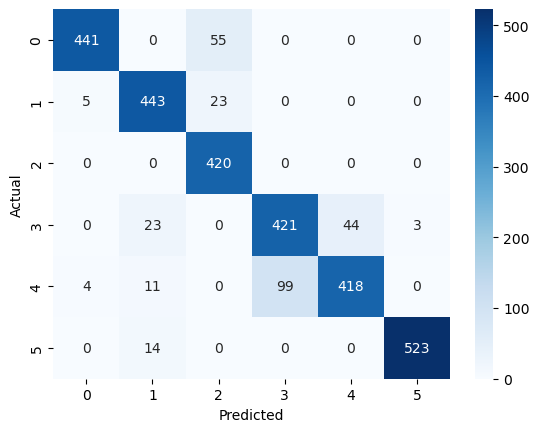

In [4]:

def preprocess_data(acc_data, gyro_data, labels):
   
  
    acc_stack = np.stack([acc_data['x'], acc_data['y'], acc_data['z']], axis=-1)
    gyro_stack = np.stack([gyro_data['x'], gyro_data['y'], gyro_data['z']], axis=-1)
    combined = np.concatenate([acc_stack, gyro_stack], axis=-1)
    
    
    scaler = StandardScaler()
    samples, timesteps, features = combined.shape
    combined = scaler.fit_transform(combined.reshape(-1, features)).reshape(samples, timesteps, features)
    
   
    labels = labels - 1
    
    return combined, labels


if __name__ == "__main__":
  
    dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
    extract_path = "./data"

  
    dataset_path = download_and_extract_dataset(dataset_url, extract_path, dataset_folder_name="UCI HAR Dataset")

    
    data = load_raw_inertial_data(dataset_path)


    X_train, y_train = preprocess_data(data["train_acc"], data["train_gyro"], data["train_labels"])
    X_test, y_test = preprocess_data(data["test_acc"], data["test_gyro"], data["test_labels"])


    input_shape = (X_train.shape[1], X_train.shape[2])
    num_classes = len(np.unique(y_train))
    model = build_model(input_shape, num_classes)
    print("Training model...")
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


    evaluate_model(model, X_test, y_test)